In [ ]:
# Importing the relevant libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, t, norm
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
# Reading the dataset into our environment
data = pd.read_csv("/content/Final_IMDB_Movies.csv")
data

,movie_imdb_link,color,movie_title,language,title_year,duration,director_name,actor_1_name,actor_2_name,actor_3_name,...,num_critic_for_reviews,num_user_for_reviews,num_voted_users,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,facenumber_in_poster
0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Color,Avatar,English,2009,178,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,...,723,3054,886204,0,1000,936,855,4834,33000,0
1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Color,Pirates of the Caribbean: At World's End,English,2007,169,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,...,302,1238,471220,563,40000,5000,1000,48350,0,0
2,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Color,Spectre,English,2015,148,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,...,602,994,275868,0,11000,393,161,11700,85000,1
3,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Color,The Dark Knight Rises,English,2012,164,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,...,813,2701,1144337,22000,27000,23000,23000,106759,164000,0
4,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Color,John Carter,English,2012,132,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,...,462,738,212204,475,640,632,530,1873,24000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,http://www.imdb.com/title/tt0388838/?ref_=fn_t...,Color,Clean,French,2004,110,Olivier Assayas,Maggie Cheung,Béatrice Dalle,Don McKellar,...,81,39,3924,107,576,133,45,776,171,1
3657,http://www.imdb.com/title/tt0255094/?ref_=fn_t...,Color,The Circle,Persian,2000,90,Jafar Panahi,Fereshteh Sadre Orafaiy,Nargess Mamizadeh,Mojgan Faramarzi,...,64,26,4555,397,5,0,0,5,697,0
3658,http://www.imdb.com/title/tt0390384/?ref_=fn_t...,Color,Primer,English,2004,77,Shane Carruth,Shane Carruth,David Sullivan,Casey Gooden,...,143,371,72639,291,291,45,8,368,19000,0
3659,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Color,El Mariachi,Spanish,1992,81,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,...,56,130,52055,0,121,20,6,147,0,0


In [ ]:
data.shape

(3661, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3661 entries, 0 to 3660
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_imdb_link            3661 non-null   object 
 1   color                      3661 non-null   object 
 2   movie_title                3661 non-null   object 
 3   language                   3660 non-null   object 
 4   title_year                 3661 non-null   int64  
 5   duration                   3661 non-null   int64  
 6   director_name              3661 non-null   object 
 7   actor_1_name               3661 non-null   object 
 8   actor_2_name               3661 non-null   object 
 9   actor_3_name               3661 non-null   object 
 10  genres                     3661 non-null   object 
 11  country                    3661 non-null   object 
 12  budget                     3661 non-null   float64
 13  gross                      3661 non-null   float

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

movie_imdb_link              0
color                        0
movie_title                  0
language                     1
title_year                   0
duration                     0
director_name                0
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
genres                       0
country                      0
budget                       0
gross                        0
plot_keywords                0
content_rating               0
aspect_ratio                 0
imdb_score                   0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
movie_facebook_likes         0
facenumber_in_poster         0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

movie_imdb_link              0
color                        0
movie_title                  0
language                     0
title_year                   0
duration                     0
director_name                0
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
genres                       0
country                      0
budget                       0
gross                        0
plot_keywords                0
content_rating               0
aspect_ratio                 0
imdb_score                   0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
movie_facebook_likes         0
facenumber_in_poster         0
dtype: int64

In [ ]:
data.head(3)

,movie_imdb_link,color,movie_title,language,title_year,duration,director_name,actor_1_name,actor_2_name,actor_3_name,...,num_critic_for_reviews,num_user_for_reviews,num_voted_users,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,movie_facebook_likes,facenumber_in_poster
0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Color,Avatar,English,2009,178,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,...,723,3054,886204,0,1000,936,855,4834,33000,0
1,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Color,Pirates of the Caribbean: At World's End,English,2007,169,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,...,302,1238,471220,563,40000,5000,1000,48350,0,0
2,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Color,Spectre,English,2015,148,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,...,602,994,275868,0,11000,393,161,11700,85000,1


In [ ]:
data['color'].nunique()

2

In [ ]:
data['language'].nunique()

33

In [ ]:
data['title_year'].nunique()

74

In [ ]:
data['genres'].nunique()

745

In [ ]:
#Convert budget and gross to numeric
data['budget'] = pd.to_numeric(data['budget'])#, errors='coerce')
data['gross'] = pd.to_numeric(data['gross'])#, errors='coerce')

<ipython-input-20-241651292b2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = pd.to_numeric(data['budget'])#, errors='coerce')
<ipython-input-20-241651292b2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gross'] = pd.to_numeric(data['gross'])#, errors='coerce')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(data.describe())

        title_year     duration        budget         gross  aspect_ratio  \
count  3660.000000  3660.000000  3.660000e+03  3.660000e+03   3660.000000   
mean   2002.918306   110.179781  4.579473e+07  5.185568e+07      2.108885   
std       9.878914    22.717978  2.287167e+08  6.931908e+07      0.355454   
min    1927.000000    37.000000  2.180000e+02  1.620000e+02      1.180000   
25%    1999.000000    96.000000  1.000000e+07  7.998260e+06      1.850000   
50%    2004.000000   106.000000  2.500000e+07  2.927475e+07      2.350000   
75%    2010.000000   120.000000  5.000000e+07  6.648842e+07      2.350000   
max    2016.000000   330.000000  1.221550e+10  7.605058e+08     16.000000   

        imdb_score  num_critic_for_reviews  num_user_for_reviews  \
count  3660.000000             3660.000000           3660.000000   
mean      6.462760              165.025410            331.049180   
std       1.057111              122.464334            406.194131   
min       1.600000                

In [ ]:
cleaned_data = data.copy()

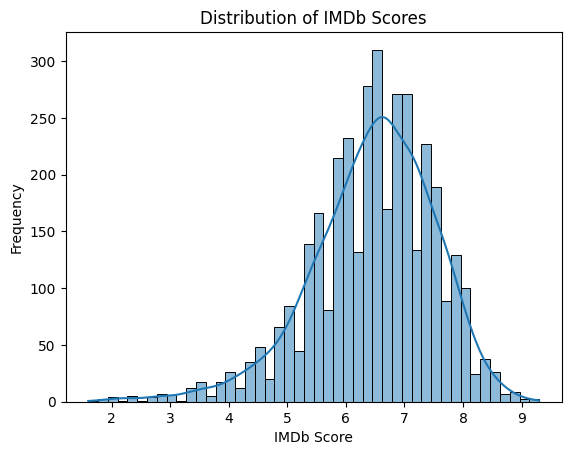

In [ ]:
# Visualize the distribution of IMDb scores
sns.histplot(cleaned_data['imdb_score'], kde=True)
plt.title('Distribution of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.show()

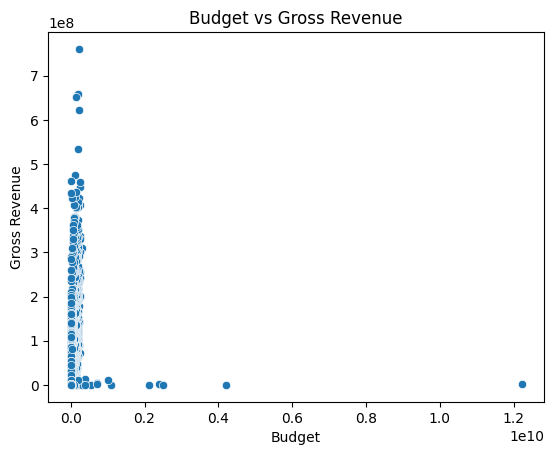

In [ ]:
# Visualize the relationship between budget and gross
sns.scatterplot(x='budget', y='gross', data=cleaned_data)
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [ ]:
cleaned_data.dtypes

movie_imdb_link               object
color                         object
movie_title                   object
language                      object
title_year                     int64
duration                       int64
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
genres                        object
country                       object
budget                       float64
gross                        float64
plot_keywords                 object
content_rating                object
aspect_ratio                 float64
imdb_score                   float64
num_critic_for_reviews         int64
num_user_for_reviews           int64
num_voted_users                int64
director_facebook_likes        int64
actor_1_facebook_likes         int64
actor_2_facebook_likes         int64
actor_3_facebook_likes         int64
cast_total_facebook_likes      int64
movie_facebook_likes           int64
f

In [ ]:
# Correlation matrix
corr_matrix = cleaned_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1'

In [ ]:
# Select relevant numerical columns
numerical_data = cleaned_data[['title_year', 'budget', 'gross']]

# Correlation matrix
corr_matrix = numerical_data.corr()

# Print the correlation matrix
print(corr_matrix)

            title_year    budget     gross
title_year    1.000000  0.044247  0.047316
budget        0.044247  1.000000  0.094295
gross         0.047316  0.094295  1.000000


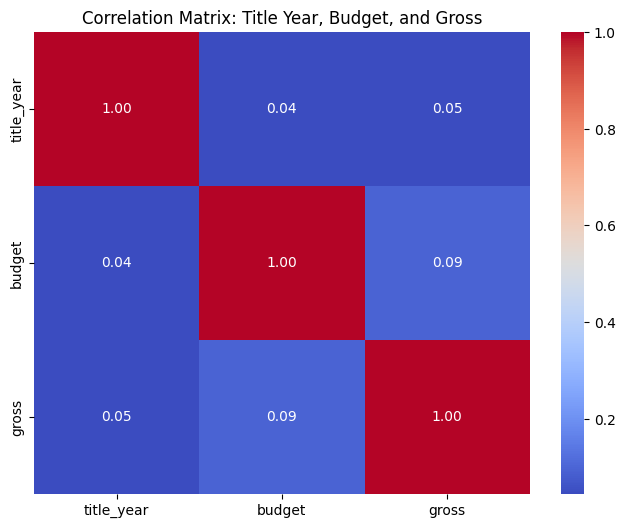

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Title Year, Budget, and Gross')
plt.show()

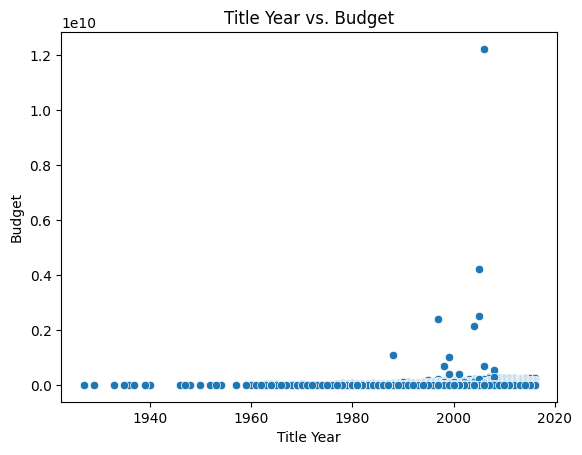

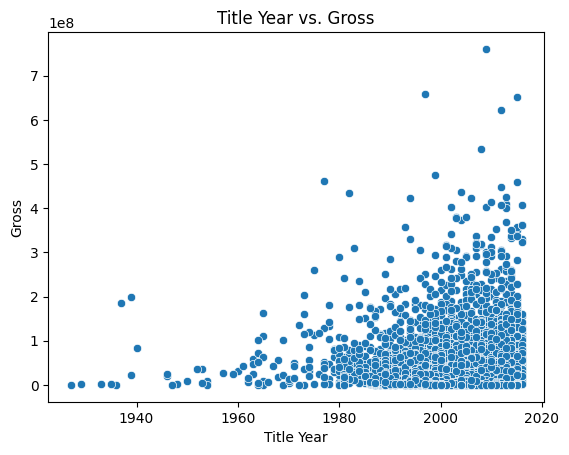

In [ ]:
# Scatter plot of title_year vs. budget
sns.scatterplot(x='title_year', y='budget', data=cleaned_data)
plt.title('Title Year vs. Budget')
plt.xlabel('Title Year')
plt.ylabel('Budget')
plt.show()

# Scatter plot of title_year vs. gross
sns.scatterplot(x='title_year', y='gross', data=cleaned_data)
plt.title('Title Year vs. Gross')
plt.xlabel('Title Year')
plt.ylabel('Gross')
plt.show()

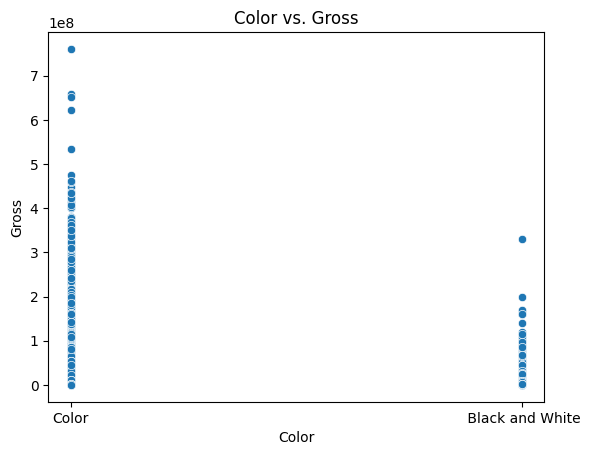

In [ ]:
# Visualize Color against gross
sns.scatterplot(x='color', y='gross', data=cleaned_data)
plt.title('Color vs. Gross')
plt.xlabel('Color')
plt.ylabel('Gross')
plt.show()

In [ ]:
cleaned_data['profit/loss'] = cleaned_data['gross'] - cleaned_data['budget']

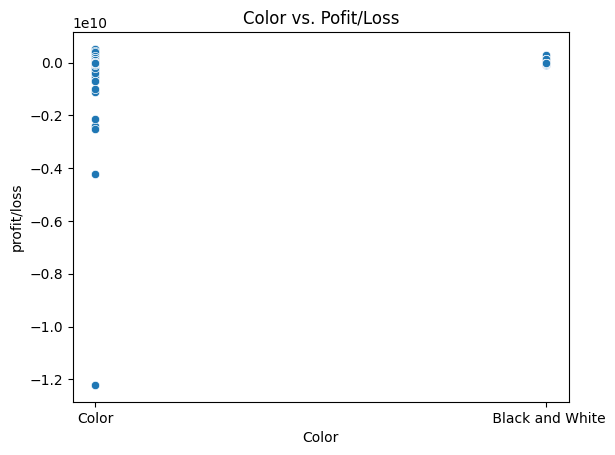

In [ ]:
# Visualize Color against profit/loss
sns.scatterplot(x='color', y='profit/loss', data=cleaned_data)
plt.title('Color vs. Pofit/Loss')
plt.xlabel('Color')
plt.ylabel('profit/loss')
plt.show()

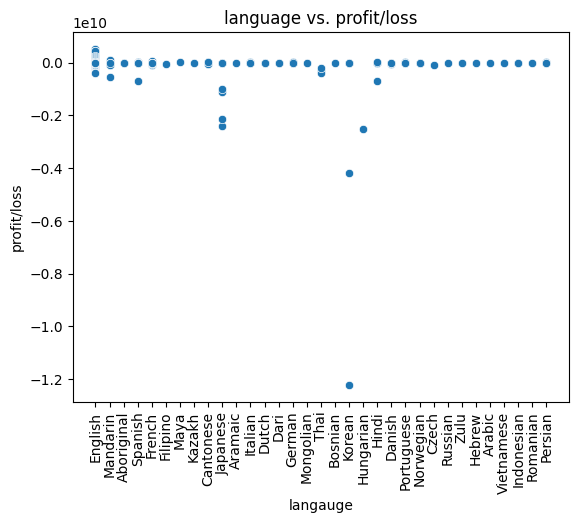

In [ ]:
# Visualize language against profit/loss
sns.scatterplot(x='language', y='profit/loss', data=cleaned_data)
plt.title('language vs. profit/loss')
plt.xlabel('langauge')
plt.xticks(rotation=90)
plt.ylabel('profit/loss')
plt.show()